# A First Example
We want to get the daily closing stock prices from 2016 to 2020 for the major players in the distilled and blended liquor industry. These are Brown-Forman Corporation (BF-B), Diageo (DEO), Eastside Distilling (EAST), and MGP Ingredients (MGPI). After retrieving the data, we want to make a simple line plot for each company.

In [1]:
# We are going to use a package called 'yahooquery'
# It pulls the data from Yahoo Finance.
from yahooquery import Ticker

%matplotlib inline

In [2]:
# We create a Ticker object by passing it a list of four ticker symbols
# The second parameter passed in tells the code to make requests to
# Yahoo Finance asynchronously (need to do this for when querying
# multiple ticker symbols).

tickers = Ticker("BF-B DEO EAST MGPI", asynchronous=True)

In [3]:
# Get the daily stock price history starting January 1, 2016
# and ending December 31, 2020. The result will be a pandas
# DataFrame, which I am calling 'df'. We can look at the first
# few rows using the .head() function.

df = tickers.history(start="2016-01-01", end="2020-12-31")
df.head()

high   volume        low      close       open  \
symbol date                                                              
BF-B   2016-01-04  39.160000  3212750  38.004002  38.883999  39.007999   
       2016-01-05  39.023998  2395500  38.484001  38.903999  38.832001   
       2016-01-06  38.816002  3235000  38.015999  38.152000  38.459999   
       2016-01-07  38.192001  2719750  37.240002  37.344002  37.728001   
       2016-01-08  37.911999  1939750  37.112000  37.212002  37.512001   

                    adjclose  dividends  splits  
symbol date                                      
BF-B   2016-01-04  35.859585        0.0     0.0  
       2016-01-05  35.878017        0.0     0.0  
       2016-01-06  35.184528        0.0     0.0  
       2016-01-07  34.439365        0.0     0.0  
       2016-01-08  34.317635        0.0     0.0

In [4]:
# Take a peek at what the dataframe looks like
# We see can see all of the columns of the dataframe, along with how
# how many rows there are as well as the datatype for each column.
# Useful information!

df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4780 entries, ('BF-B', datetime.date(2016, 1, 4)) to ('MGPI', datetime.date(2020, 12, 30))
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   high       4780 non-null   float64
 1   volume     4780 non-null   int64  
 2   low        4780 non-null   float64
 3   close      4780 non-null   float64
 4   open       4780 non-null   float64
 5   adjclose   4780 non-null   float64
 6   dividends  4780 non-null   float64
 7   splits     4780 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 322.7+ KB


In [5]:
# We can take a look at the index of the dataframe.
# We have a MultiIndex -- this is also considered a hierarchal index.
# Unfortunately, for our simple desire of a line plot, this type of index
# makes it slightly more "involved" to get our graph

df.index

MultiIndex([('BF-B', 2016-01-04),
            ('BF-B', 2016-01-05),
            ('BF-B', 2016-01-06),
            ('BF-B', 2016-01-07),
            ('BF-B', 2016-01-08),
            ('BF-B', 2016-01-11),
            ('BF-B', 2016-01-12),
            ('BF-B', 2016-01-13),
            ('BF-B', 2016-01-14),
            ('BF-B', 2016-01-15),
            ...
            ('MGPI', 2020-12-16),
            ('MGPI', 2020-12-17),
            ('MGPI', 2020-12-18),
            ('MGPI', 2020-12-21),
            ('MGPI', 2020-12-22),
            ('MGPI', 2020-12-23),
            ('MGPI', 2020-12-24),
            ('MGPI', 2020-12-28),
            ('MGPI', 2020-12-29),
            ('MGPI', 2020-12-30)],
           names=['symbol', 'date'], length=4780)

In [6]:
# We can also list all of the columns of our dataframe
df.columns

Index(['high', 'volume', 'low', 'close', 'open', 'adjclose', 'dividends',
       'splits'],
      dtype='object')

In [7]:
# Let's look at Brown-Forman (because they make Woodford Reserve).
# We can use the .loc() function to pull out just BF-B.
df.loc[("BF-B")]

,high,volume,low,close,open,adjclose,dividends,splits
date,,,,,,,,
2016-01-04,39.160000,3212750,38.004002,38.883999,39.007999,35.859585,0.0,0.0
2016-01-05,39.023998,2395500,38.484001,38.903999,38.832001,35.878017,0.0,0.0
2016-01-06,38.816002,3235000,38.015999,38.152000,38.459999,35.184528,0.0,0.0
2016-01-07,38.192001,2719750,37.240002,37.344002,37.728001,34.439365,0.0,0.0
2016-01-08,37.911999,1939750,37.112000,37.212002,37.512001,34.317635,0.0,0.0
...,...,...,...,...,...,...,...,...
2020-12-23,78.529999,587900,77.260002,77.580002,77.940002,77.580002,0.0,0.0
2020-12-24,78.089996,235800,76.720001,78.029999,77.419998,78.029999,0.0,0.0
2020-12-28,78.959999,631300,77.570000,78.349998,78.739998,78.349998,0.0,0.0


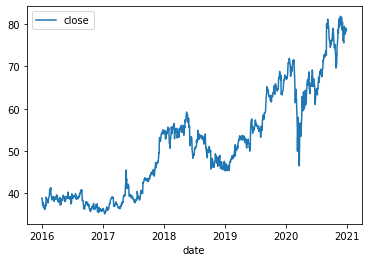

In [8]:
# We can easily plot BF-B closing price over the 5-year period.
# The pandas dataframe let's us plot directly with it ... pretty cool!
df.loc[("BF-B")].plot(y="close")

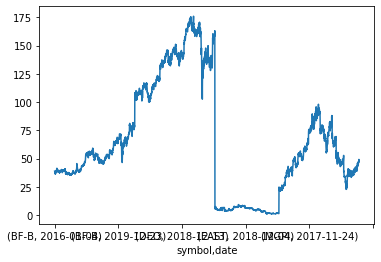

In [9]:
# What happens if we try to plot the closing price for everything?
# This plots only a single line ... 
df['close'].plot()

## No Good
That result does not look correct. I wanted to see 4 different lines, one for each ticker symbol. Instead, I got a single line. Here is where the <code>MultiIndex</code> on our original dataframe is causing us some pain.

### One Approach to Fix
Let's create a new <code>DataFrame</code> that stores the just the closing stock price over the 5-year period, but make each column one of the ticker symbols.

#### Step 1.
Pull out the closing stock price for BF-B as a <code>Series</code>, rename it, and make it a <code>DataFrame</code> called <code>myDF</code>.

#### Step 2.
Add DEO, EAST, and MGPI to <code>myDF</code> each as its only column, naming them correctly.

#### Step 3.
Look at our <code>myDF</code> to see what it looks like

In [10]:
# Step 1.
myDF = df.loc["BF-B"]["close"].rename("BF-B").to_frame()

# Step 2.
myDF["DEO"] = df.loc["DEO"]["close"]
myDF["EAST"] = df.loc["EAST"]["close"]
myDF["MGPI"] = df.loc["MGPI"]["close"]
myDF

,BF-B,DEO,EAST,MGPI
date,,,,
2016-01-04,38.883999,107.750000,NaN,24.520000
2016-01-05,38.903999,108.349998,NaN,24.719999
2016-01-06,38.152000,107.220001,NaN,24.730000
2016-01-07,37.344002,104.699997,NaN,23.670000
2016-01-08,37.212002,104.580002,NaN,23.000000
...,...,...,...,...
2020-12-23,77.580002,158.660004,1.24,46.730000
2020-12-24,78.029999,159.350006,1.25,47.380001
2020-12-28,78.349998,159.820007,1.30,49.209999


## Time to Plot
Let's use the package <code>seaborn</code> to plot the four time series. I'll set the style to <code>ticks</code> to clean up the plot a little. Additionally, we'll make the color palette colorblind-friendly. Finally, I <code>despine</code> the plot which is simply removing the top and right lines of the graph region.

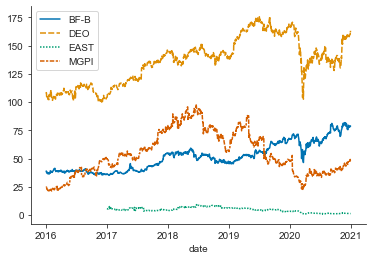

In [11]:
import seaborn as sns
sns.set_style("ticks")

sns.lineplot(data=myDF, palette="colorblind")
sns.despine()

## Some Additional Exploration
A few more looks at the dataframe after it came back from our initial call to get the data